# Lecture 06

In [1]:
from sklearn.datasets import load_digits, load_iris, load_wine, load_boston, load_breast_cancer

In [2]:
!pip install scikit-learn==1.0.1

     |████████████████████████████████| 23.2 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Log-transform và Scaling data

In [3]:
load_func = load_wine
data = load_func(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
df = data['frame']
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df['target'].value_counts(dropna=False)

1    71
0    59
2    48
Name: target, dtype: int64

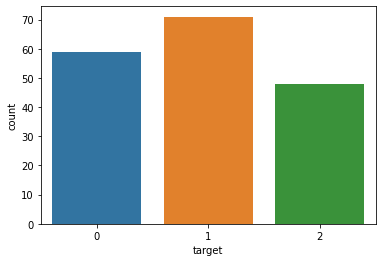

In [8]:
sns.countplot(data=df, x='target')

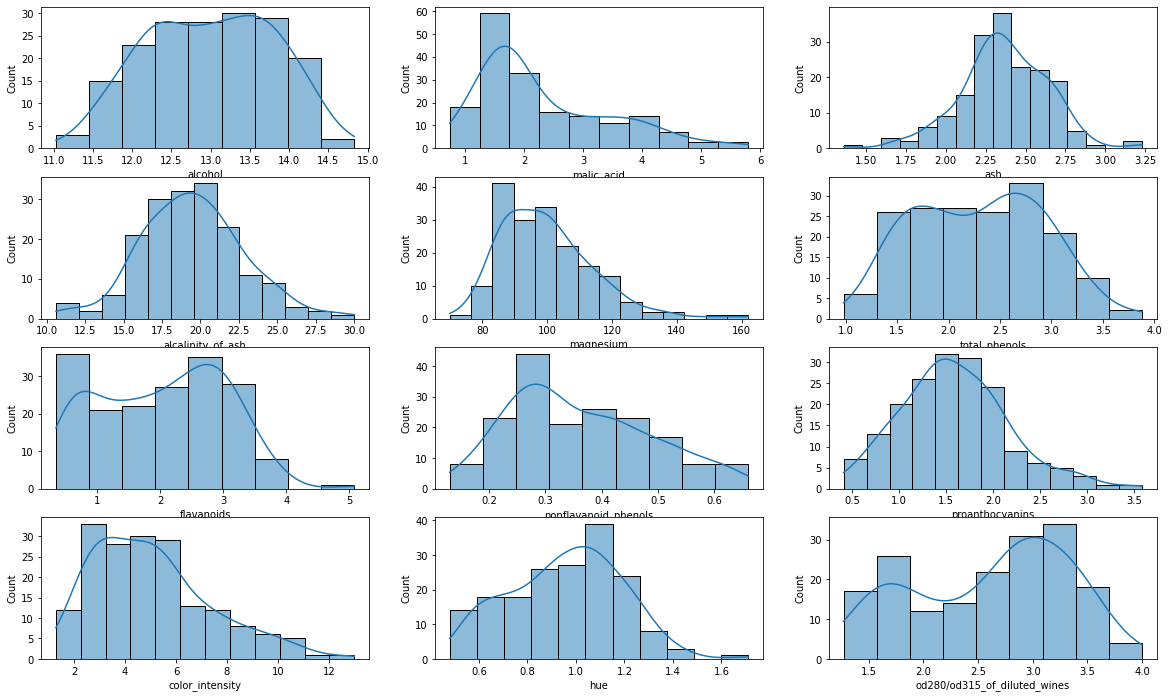

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(df.columns, axs.ravel()):
    sns.histplot(data=df, x=col_name, kde=True, ax=ax)

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
X, y = df.drop(columns='target'), df['target']
y = y.gt(0).astype(int)

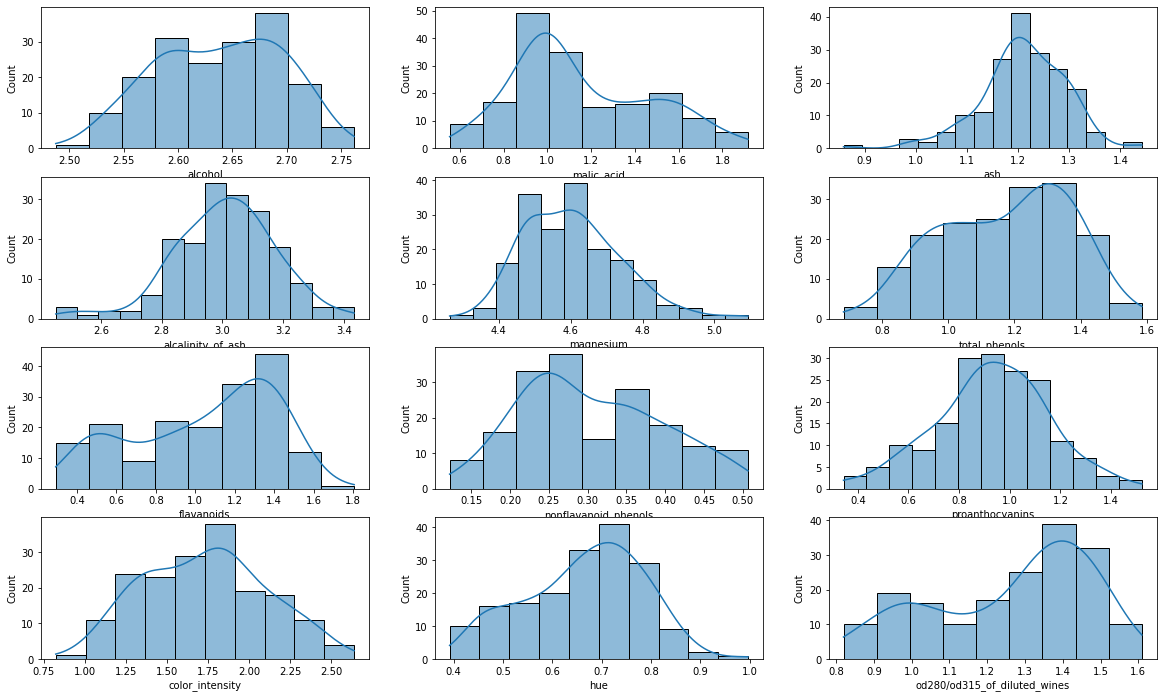

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X.columns, axs.ravel()):
    sns.histplot(data=np.log1p(X), x=col_name, kde=True, ax=ax) # log1p np.log(x + 1) => tránh trường hợp x = 0 log -> inf
    # lấy log: nôm na: giá trị ở rất xa (left skew) -> vào gần lại

In [13]:
np.log(-10) # ~ np.log(10)*-1
-1*np.log(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


-2.302585092994046

In [14]:
np.exp(-2.3)

0.10025884372280375

In [15]:
def negative_log(x):
    return np.sign(x)*np.log(np.abs(x))

In [16]:
negative_log(-100)

-4.605170185988092


### Standard-Scaler

Biến đổi Zscore về phân phối chuẩn

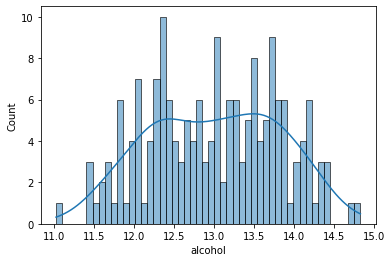

In [20]:
sns.histplot(
    data=X, x = 'alcohol', 
    bins=50, kde=True
)

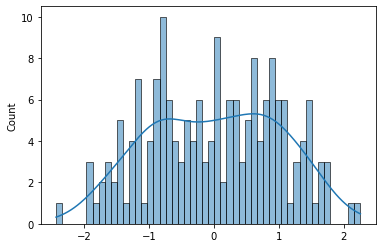

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X[['alcohol']]) # fit_transform() nhận Dataframe hoặc np.array dạng ma trận 
# fit() transform()
# x_scaled # trả lại dưới dạng np.array
sns.histplot(
    x = x_scaled[:, 0], # lấy ra cột đầu tiên trong ma trận đc trả lại
    bins=50, kde=True
)

### Robust-Scaler

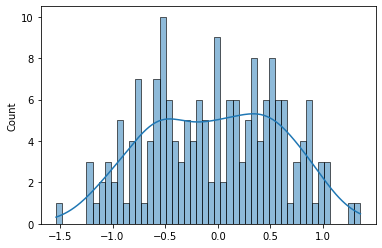

In [26]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X[['alcohol']])
sns.histplot(
    x = x_scaled[:, 0], # lấy ra cột đầu tiên trong ma trận đc trả lại
    bins=50, kde=True
)

### Fit() và Transform()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=420)

scaler = RobustScaler()
scaler.fit(x_train) # Tính toán các thông số về phân phối dựa trên bộ dữ liệu train

RobustScaler()

In [ ]:
scaler.transform(x_test) # Scale dữ liệu test dựa trên phân phối của bộ dữ liệu train
# Cho kết quả tương đối khác với fit_transform đặc biệt trong trường hợp dữ liệu split ko đều theo phân phối

array([[ 0.136     ,  1.43356643, -0.11764706,  0.66666667, -0.63157895,
        -0.56862745, -0.26347305,  1.35      ,  0.19178082,  0.05649718,
        -0.33333333, -0.57480315, -0.32142857],
       [-0.472     , -0.13986014, -0.44117647,  0.2       ,  0.31578947,
        -1.10784314, -0.60479042,  0.15      , -0.02739726, -0.43785311,
        -0.15      , -0.72440945,  0.52380952],
       [ 0.504     , -0.00699301,  0.85294118, -0.11111111,  0.68421053,
         0.11764706,  0.2994012 , -0.25      ,  0.08219178, -0.11299435,
         0.38888889,  0.1023622 ,  1.05952381],
       [ 0.544     , -0.05594406,  0.29411765,  0.22222222,  1.        ,
         0.71568627,  0.4491018 , -0.7       ,  1.32876712,  0.46610169,
         0.05555556,  0.22834646,  1.11904762],
       [ 0.664     ,  0.03496503,  0.        , -0.64444444,  0.21052632,
         0.37254902,  0.50898204, -0.35      ,  0.28767123, -0.2259887 ,
         0.41666667,  0.99212598,  0.91666667],
       [ 1.072     ,  1.524475

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.859171,-0.123538,0.200603,-0.994948,1.327738,0.381901,0.458575,-0.369778,0.933410,0.289007,0.216034,0.752310,0.677016
1,0.113138,-0.066893,-0.658824,-2.446979,0.103365,0.258412,0.322426,-0.496899,-0.420396,-0.104857,0.244234,0.433490,0.656054
2,0.083086,0.353999,0.858584,-0.211677,0.154283,0.381901,0.535514,-0.244627,1.475141,0.300249,0.187695,0.280255,0.834803
3,0.956657,0.064944,0.397154,-0.665868,0.729108,1.129995,0.637123,-0.626055,0.807867,0.816171,-0.316677,0.465741,1.163374
4,0.143107,0.501066,1.374828,0.332955,0.950948,0.381901,0.289095,0.295713,0.364325,-0.125849,0.216034,0.111070,0.129074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.489063,1.870347,0.257167,0.224561,-0.159031,-0.688781,-1.181919,1.017409,-0.794995,0.794779,-1.042621,-0.918369,0.139089
174,0.262145,1.196567,0.341401,0.743204,0.204704,-0.554472,-1.034033,0.524723,-0.215685,0.706680,-0.835403,-1.112310,0.158917
175,0.165528,1.357940,-0.293947,0.113617,1.037085,-0.793521,-1.095910,0.524723,-0.308759,1.267571,-1.221179,-1.112310,0.317518
176,0.090607,0.501066,0.028912,0.113617,1.037085,-0.723298,-1.106435,1.070341,-0.139876,1.110773,-1.185022,-1.046188,0.326338


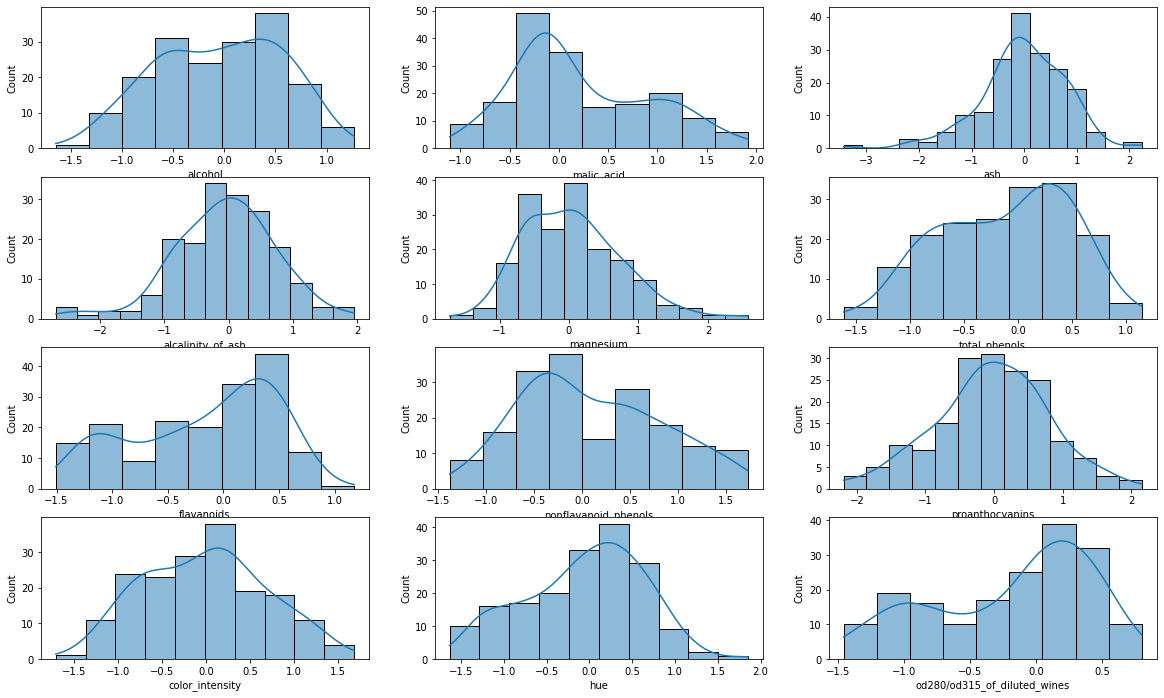

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X_scaled.columns, axs.ravel()):
    sns.histplot(data=X_scaled, x=col_name, kde=True, ax=ax)

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

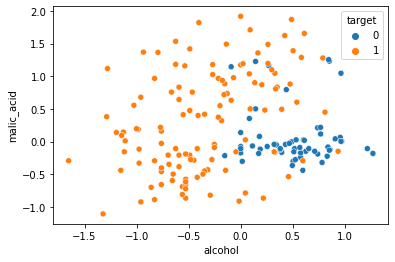

In [ ]:
sns.scatterplot(data=X_scaled, x='alcohol', y='malic_acid', hue=y, palette='tab10')

## Cross-Validation (Kiểm chứng chéo)

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

K-fold: gập dữ liệu lại và thực hiện train-test trên mỗi nếp gấp.

Mỗi nếp gấp: để 1 phần ra để test và train trên tất cả các phần còn lại.

Cách huấn luyện và test lại liên tục như vậy để tìm tham số mô hình tốt nhất gọi là Kiểm chứng chéo (cross-validate)

In [28]:
from sklearn.model_selection import train_test_split, KFold #, StratifiedKFold, RepeatedKFold

In [29]:
X_scaled = RobustScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(124, 13)

(54, 13)

(124,)

(54,)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.91      0.97      0.94        32

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



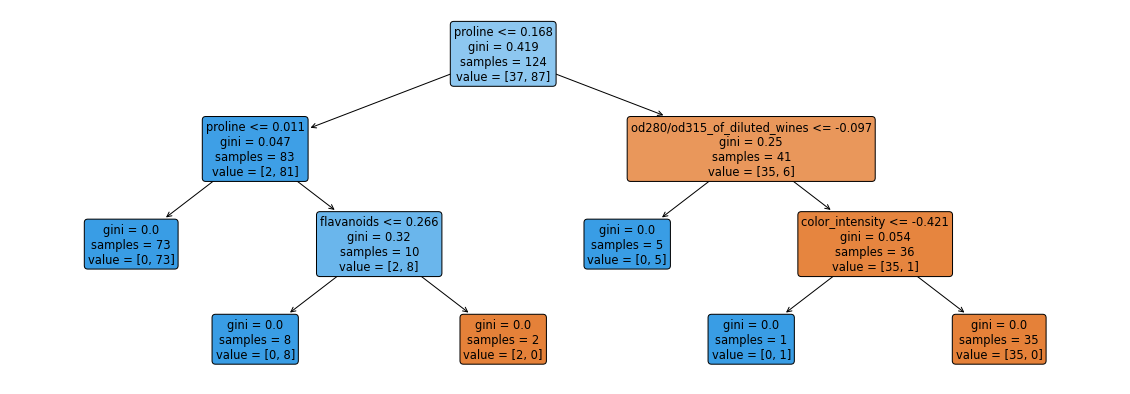

In [31]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 7))
ax = plt.subplot()
_ = plot_tree(tree, max_depth=3, feature_names=X.columns, ax=ax, filled=True, rounded=True)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate

In [36]:
import os

os.cpu_count()

2

In [42]:
cv = KFold() # cv ~ cross-validate # random_state=420, shuffle=True

tree = DecisionTreeClassifier() # Initiate mô hình
tree_scores = cross_val_score(tree, X_scaled, y, cv=cv, n_jobs=2)

In [37]:
tree_scores

array([0.80555556, 0.94444444, 0.91666667, 0.97142857, 0.97142857])

In [38]:
print(f'{tree_scores.mean()*100:.2f} accuracy with a standard deviation of {tree_scores.std()*100:.2f}')

92.19 accuracy with a standard deviation of 6.16


In [39]:
tree_scores.mean()/tree_scores.std()

14.964003647035572

In [43]:
cv = KFold()

tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(tree, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [44]:
tree_scores

{'fit_time': array([0.00182247, 0.00196338, 0.00164938, 0.00108123, 0.00130749]),
 'score_time': array([0.00986409, 0.00879908, 0.00663948, 0.00541449, 0.00365162]),
 'test_accuracy': array([0.83333333, 0.91666667, 0.91666667, 0.77142857, 0.82857143]),
 'test_f1': array([0.        , 0.89655172, 0.95652174, 0.87096774, 0.90625   ]),
 'test_precision': array([0.    , 0.8125, 1.    , 1.    , 1.    ]),
 'test_recall': array([0.        , 1.        , 0.91666667, 0.77142857, 0.82857143])}

In [45]:
tree_scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [46]:
tree_scores = pd.DataFrame(tree_scores)
tree_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.001822,0.009864,0.833333,0.0000,0.000000,0.000000
1,0.001963,0.008799,0.916667,0.8125,1.000000,0.896552
2,0.001649,0.006639,0.916667,1.0000,0.916667,0.956522
3,0.001081,0.005414,0.771429,1.0000,0.771429,0.870968
4,0.001307,0.003652,0.828571,1.0000,0.828571,0.906250


In [48]:
tree_scores['test_precision'].mean()

0.7625

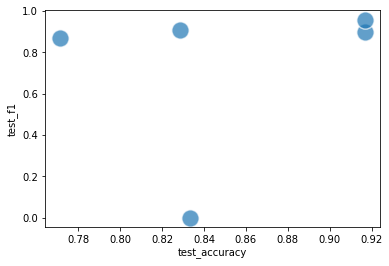

In [49]:
ax = sns.scatterplot(
    data=tree_scores, 
    x='test_accuracy', 
    y='test_f1', 
    s=300, alpha=0.7
)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
cv = KFold()

forest = RandomForestClassifier()
forest_scores = cross_validate(forest, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [52]:
forest_scores = pd.DataFrame(forest_scores)
forest_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.253155,0.030980,0.888889,0.000000,0.000000,0.000000
1,0.263240,0.034220,0.972222,0.928571,1.000000,0.962963
2,0.260382,0.030570,0.972222,1.000000,0.972222,0.985915
3,0.258680,0.031389,1.000000,1.000000,1.000000,1.000000
4,0.154018,0.024053,1.000000,1.000000,1.000000,1.000000


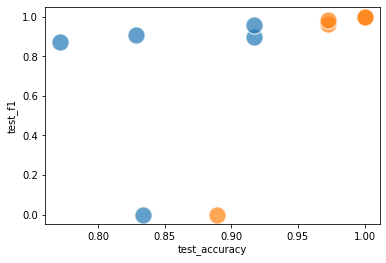

In [53]:
sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
sns.scatterplot(data=forest_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [56]:
# Làm thế nào để cross-validate được 50 lần
from sklearn.model_selection import RepeatedKFold

# RepeatedKfold
# vẫn là Kfold nhưng lặp đi lặp lại nhiều lần
# Repeat 10 lần và Kfold 5 lần ~ cross-validate 50 lần
cv = RepeatedKFold(
    n_splits=5, # fold 5 lần, mặc định là 5 lần và với bộ dữ liệu lớn có thể fold 10 lần
    n_repeats=10, # số lần lặp lại kfold, mặc định là 10 lần
    random_state=420 # random seed, kiểm soát việc shuffle lại dữ liệu sau mỗi lần repeat
)

forest = RandomForestClassifier()
forest_scores = cross_validate(forest, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

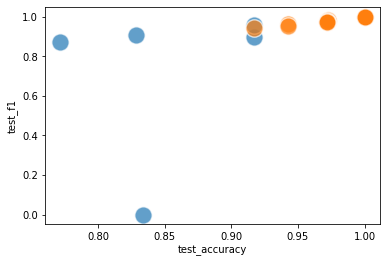

In [57]:
sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
sns.scatterplot(data=forest_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [64]:
# Làm thế nào để chia đều hơn
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

# StratifiedKfold:
# Kfold tuy nhiên đảm bảo khi dữ liệu tách ra thì tỷ lệ đều theo positive class
cv = StratifiedKFold()

tree = DecisionTreeClassifier()
tree_scores = cross_validate(tree, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [65]:
pd.DataFrame(tree_scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.001659,0.012074,0.916667,0.956522,0.916667,0.936170
1,0.001992,0.007522,0.944444,0.958333,0.958333,0.958333
2,0.001738,0.006997,0.916667,0.956522,0.916667,0.936170
3,0.001761,0.007111,0.914286,0.916667,0.956522,0.936170
4,0.001828,0.004426,0.828571,1.000000,0.750000,0.857143


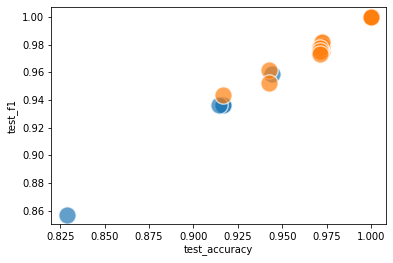

In [66]:
sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
sns.scatterplot(data=forest_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

### Tinh chỉnh tham số (Tuning)

In [67]:
bbfrom sklearn.model_selection import GridSearchCV

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [70]:
param_grid = {
    'max_features': [4, 5, 6],
    'max_depth': [3, 4, 5, 6]
}

forest = RandomForestClassifier() # model
gs = GridSearchCV(forest, param_grid, scoring=scoring, cv=cv, verbose=5, refit=False)
gs_result = gs.fit(X_scaled, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=3, max_features=4; accuracy: (test=0.972) f1: (test=0.979) precision: (test=1.000) recall: (test=0.958) total time=   0.2s
[CV 2/5] END max_depth=3, max_features=4; accuracy: (test=0.972) f1: (test=0.980) precision: (test=0.960) recall: (test=1.000) total time=   0.2s
[CV 3/5] END max_depth=3, max_features=4; accuracy: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   0.2s
[CV 4/5] END max_depth=3, max_features=4; accuracy: (test=0.971) f1: (test=0.979) precision: (test=0.958) recall: (test=1.000) total time=   0.2s
[CV 5/5] END max_depth=3, max_features=4; accuracy: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   0.2s
[CV 1/5] END max_depth=3, max_features=5; accuracy: (test=0.972) f1: (test=0.979) precision: (test=1.000) recall: (test=0.958) total time=   0.2s
[CV 2/5] END max_depth=3, max_features=5; accuracy: (test=0.972

In [71]:
gs_result

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': [4, 5, 6]},
             refit=False, scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=5)

In [72]:
gs_result.cv_results_

{'mean_fit_time': array([0.15446601, 0.15371199, 0.15625787, 0.15540838, 0.15854774,
        0.15794296, 0.15781608, 0.15692573, 0.16336122, 0.15803761,
        0.15785146, 0.1586019 ]),
 'mean_score_time': array([0.01709857, 0.01725106, 0.01821175, 0.01965103, 0.01692157,
        0.01776247, 0.01714969, 0.01691117, 0.01929116, 0.01723461,
        0.01812172, 0.02201371]),
 'mean_test_accuracy': array([0.9831746 , 0.9831746 , 0.97761905, 0.98873016, 0.9831746 ,
        0.9831746 , 0.9831746 , 0.9831746 , 0.97761905, 0.98873016,
        0.9831746 , 0.97761905]),
 'mean_test_f1': array([0.98740773, 0.98740773, 0.9833261 , 0.99148936, 0.98740773,
        0.98740773, 0.98740773, 0.98740773, 0.9833261 , 0.99148936,
        0.98740773, 0.9833261 ]),
 'mean_test_precision': array([0.98366667, 0.98366667, 0.97566667, 0.99166667, 0.98366667,
        0.98366667, 0.98366667, 0.98366667, 0.97566667, 0.99166667,
        0.98366667, 0.97566667]),
 'mean_test_recall': array([0.99166667, 0.99166667, 0

In [73]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.154466,0.006348,0.017099,0.000361,3,4,"{'max_depth': 3, 'max_features': 4}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
1,0.153712,0.004781,0.017251,0.000477,3,5,"{'max_depth': 3, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
2,0.156258,0.006107,0.018212,0.002329,3,6,"{'max_depth': 3, 'max_features': 6}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,10,1.0,0.96,0.96,0.958333,1.0,0.975667,0.019877,10,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,0.979592,0.978723,1.0,0.983326,0.008346,10
3,0.155408,0.005320,0.019651,0.002122,4,4,"{'max_depth': 4, 'max_features': 4}",0.972222,1.000000,1.000000,0.971429,1.0,0.988730,0.013805,1,1.0,1.00,1.00,0.958333,1.0,0.991667,0.016667,1,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,1.000000,1.000000,0.978723,1.0,0.991489,0.010423,1
4,0.158548,0.003887,0.016922,0.000406,4,5,"{'max_depth': 4, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
5,0.157943,0.006383,0.017762,0.001358,4,6,"{'max_depth': 4, 'max_features': 6}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
6,0.157816,0.008741,0.017150,0.001046,5,4,"{'max_depth': 5, 'max_features': 4}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
7,0.156926,0.005147,0.016911,0.000740,5,5,"{'max_depth': 5, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3
8,0.163361,0.006476,0.019291,0.002955,5,6,"{'max_depth': 5, 'max_features': 6}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,10,1.0,0.96,0.96,0.958333,1.0,0.975667,0.019877,10,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,0.979592,0.978723,1.0,0.983326,0.008346,10
9,0.158038,0.005931,0.017235,0.000736,6,4,"{'max_depth': 6, 'max_features': 4}",0.972222,1.000000,1.000000,0.971429,1.0,0.988730,0.013805,1,1.0,1.00,1.00,0.958333,1.0,0.991667,0.016667,1,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,1.000000,1.000000,0.978723,1.0,0.991489,0.010423,1


In [74]:
params = gs_result_df['params'].apply(pd.Series)
params

,max_depth,max_features
0,3,4
1,3,5
2,3,6
3,4,4
4,4,5
5,4,6
6,5,4
7,5,5
8,5,6
9,6,4


In [75]:
gs_result_df = gs_result_df.join(params)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,max_depth,max_features
0,0.154466,0.006348,0.017099,0.000361,3,4,"{'max_depth': 3, 'max_features': 4}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,3,4
1,0.153712,0.004781,0.017251,0.000477,3,5,"{'max_depth': 3, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,3,5
2,0.156258,0.006107,0.018212,0.002329,3,6,"{'max_depth': 3, 'max_features': 6}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,10,1.0,0.96,0.96,0.958333,1.0,0.975667,0.019877,10,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,0.979592,0.978723,1.0,0.983326,0.008346,10,3,6
3,0.155408,0.005320,0.019651,0.002122,4,4,"{'max_depth': 4, 'max_features': 4}",0.972222,1.000000,1.000000,0.971429,1.0,0.988730,0.013805,1,1.0,1.00,1.00,0.958333,1.0,0.991667,0.016667,1,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,1.000000,1.000000,0.978723,1.0,0.991489,0.010423,1,4,4
4,0.158548,0.003887,0.016922,0.000406,4,5,"{'max_depth': 4, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,4,5
5,0.157943,0.006383,0.017762,0.001358,4,6,"{'max_depth': 4, 'max_features': 6}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,4,6
6,0.157816,0.008741,0.017150,0.001046,5,4,"{'max_depth': 5, 'max_features': 4}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,5,4
7,0.156926,0.005147,0.016911,0.000740,5,5,"{'max_depth': 5, 'max_features': 5}",0.972222,0.972222,1.000000,0.971429,1.0,0.983175,0.013741,3,1.0,0.96,1.00,0.958333,1.0,0.983667,0.020011,3,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,1.000000,0.978723,1.0,0.987408,0.010286,3,5,5
8,0.163361,0.006476,0.019291,0.002955,5,6,"{'max_depth': 5, 'max_features': 6}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,10,1.0,0.96,0.96,0.958333,1.0,0.975667,0.019877,10,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,0.979592,0.979592,0.978723,1.0,0.983326,0.008346,10,5,6
9,0.158038,0.005931,0.017235,0.000736,6,4,"{'max_depth': 6, 'max_features': 4}",0.972222,1.000000,1.000000,0.971429,1.0,0.988730,0.013805,1,1.0,1.00,1.00,0.958333,1.0,0.991667,0.016667,1,0.958333,1.0,1.0,1.0,1.0,0.991667,0.016667,1,0.978723,1.000000,1.000000,0.978723,1.0,0.991489,0.010423,1,6,4


In [76]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
gs_result_df[['max_features', 'max_depth', *mean_cols, *rank_cols]]

,max_features,max_depth,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy,rank_test_precision,rank_test_recall,rank_test_f1
0,4,3,0.154466,0.017099,0.983175,0.983667,0.991667,0.987408,3,3,1,3
1,5,3,0.153712,0.017251,0.983175,0.983667,0.991667,0.987408,3,3,1,3
2,6,3,0.156258,0.018212,0.977619,0.975667,0.991667,0.983326,10,10,1,10
3,4,4,0.155408,0.019651,0.988730,0.991667,0.991667,0.991489,1,1,1,1
4,5,4,0.158548,0.016922,0.983175,0.983667,0.991667,0.987408,3,3,1,3
5,6,4,0.157943,0.017762,0.983175,0.983667,0.991667,0.987408,3,3,1,3
6,4,5,0.157816,0.017150,0.983175,0.983667,0.991667,0.987408,3,3,1,3
7,5,5,0.156926,0.016911,0.983175,0.983667,0.991667,0.987408,3,3,1,3
8,6,5,0.163361,0.019291,0.977619,0.975667,0.991667,0.983326,10,10,1,10
9,4,6,0.158038,0.017235,0.988730,0.991667,0.991667,0.991489,1,1,1,1
